In [1]:
from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
import uproot as up
import pandas as pd
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import matplotlib.pyplot as plt

from helpers import get_summary_table

In [2]:
fname = '../output/ZmmYee/Data/crab_TTree_13TeV_fourmuon_2018BCD_v6.root'

In [3]:
events = NanoEventsFactory.from_root({fname: "ntuple"},
     schemaclass=BaseSchema,
     entry_stop=100,
).events()

In [4]:
columns = ['Event', 'Run', 'LumiBlock',
           'Mu_TriggerPath',
           'Z_soft1', 'Z_soft2',
           'Z_Vtx_Mass', 'Z_mass',
           'Z_pt1', 'Z_pt2', 'Z_eta1', 'Z_eta2',
           'Z_lowPt', 'Z_highPt',
           'Y_Vtx_Mass', 'Y_mass',
           'Y_pt1', 'Y_pt2', 'Y_eta1', 'Y_eta2',
           'Y_mvaIsoWP90_1', 'Y_mvaIsoWP90_2',
           'Z_Vtx_Prob', 'Y_Vtx_Prob',
           'FourL_mass', 'FourL_Vtx_Prob',
           'Y_lowPt', 'Y_highPt']

events = events[columns]

In [5]:
events = events.compute()

In [41]:
cut_fake = (events.Y_mass > -1)

cut_unOrdered_Z = events.Z_pt1 > events.Z_pt2
cut_unOrdered_Y = events.Y_pt1 > events.Y_pt2
cut_unOrdered = cut_unOrdered_Z & cut_unOrdered_Y

cut_MuTrigger = events.Mu_TriggerPath
cut_Zsoft = events.Z_soft1 & events.Z_soft2
cut_highPt24 = events.Z_highPt > 24
cut_dilepton_prob = (events.Y_Vtx_Prob > 0.01) & (events.Z_Vtx_Prob > 0.01)
cut_FourL_prob = events.FourL_Vtx_Prob > 0.01

cut_Pt = (events.Z_pt1 > 3.0) & (events.Z_pt2 > 3.0) & (events.Y_pt1 > 5.0) & (events.Y_pt2 > 5.0)
cut_eta = (abs(events.Z_eta1) < 2.4) & (abs(events.Z_eta2) < 2.4) & (abs(events.Y_eta1) < 2.5) & (abs(events.Y_eta2) < 2.5)
cut_detector = cut_Pt & cut_eta

cut_Ymass = (events.Y_mass > 8) & (events.Y_mass < 10)
cut_Zmass = (events.Z_mass > 70) & (events.Z_mass < 110)

cut_YmvaIsoHighpT = events.Y_mvaIsoWP90_1
cut_YmvaIsoLowpT = events.Y_mvaIsoWP90_2
cut_YmvaIsoBoth = (events.Y_mvaIsoWP90_1) & (events.Y_mvaIsoWP90_2)

cut_FourLmass = (events.FourL_mass > 112) & (events.FourL_mass < 162)

In [42]:
primary_cuts = {
    "Preselection": cut_fake,
    "UnOrdered pT": cut_unOrdered,
    "Muon Trigger": cut_MuTrigger,
    "Soft Muons": cut_Zsoft,
    "High pT Muon > 24 GeV": cut_highPt24,
    "Dilepton Vtx > 1%": cut_dilepton_prob,
    "FourL Vtx > 1%": cut_FourL_prob,
    "Detector acceptance": cut_detector,
}

mass_cuts = {
    "Y mass": cut_Ymass,
    "Z mass": cut_Zmass,
}

electronID_cuts = {
    "High pT": cut_YmvaIsoHighpT,
    "Low pT": cut_YmvaIsoLowpT,
    "Both": cut_YmvaIsoBoth,
}

fourL_mass_cuts = {
    "FourL mass": cut_FourLmass,
}

## Make a cut table

In [8]:
table, aggMask_list = get_summary_table(events, primary_cuts, mass_cuts, electronID_cuts, fourL_mass_cuts)
table

11
11
11
11


,Cuts,Candidates,Events
0,Preselection,196969,148779
1,UnOrdered pT,196940,148765
2,Muon Trigger,97607,83870
3,Soft Muons,78618,71000
4,High pT Muon > 24 GeV,78482,70919
5,Dilepton Vtx > 1%,69379,62939
6,FourL Vtx > 1%,62762,57088
7,Detector acceptance,10491,9777
8,Y mass,1853,1780
9,Z mass,1419,1395


## Make plots for each step

### Preselection

In [45]:
plot_fields = ["Z_Vtx_Mass", "Z_mass", "Z_pt1", "Z_pt2", "Z_eta1", "Z_eta2", "Y_Vtx_Mass", "Y_mass", "Y_pt1", "Y_pt2", "Y_eta1", "Y_eta2", "Z_Vtx_Prob", "Y_Vtx_Prob", "FourL_mass", "FourL_Vtx_Prob"]

(array([2200., 1799., 1414., 1262., 1146., 1089., 1032.,  983.,  933.,
         902.,  859.,  784.,  861.,  804.,  741.,  717.,  765.,  745.,
         717.,  700.,  672.,  709.,  700.,  697.,  657.,  656.,  684.,
         654.,  629.,  643.,  679.,  596.,  649.,  647.,  602.,  639.,
         637.,  630.,  649.,  632.,  667.,  628.,  632.,  622.,  652.,
         607.,  653.,  633.,  630.,  605.,  620.,  653.,  530.,  594.,
         607.,  629.,  576.,  616.,  595.,  587.,  625.,  569.,  613.,
         600.,  650.,  599.,  604.,  557.,  609.,  609.,  586.,  578.,
         606.,  554.,  573.,  572.,  619.,  557.,  550.,  564.,  578.,
         622.,  595.,  593.,  566.,  567.,  604.,  610.,  587.,  561.,
         574.,  561.,  596.,  609.,  629.,  593.,  548.,  565.,  592.,
         585.]),
 array([0.01000035, 0.01990031, 0.02980027, 0.03970023, 0.04960019,
        0.05950015, 0.06940011, 0.07930007, 0.08920003, 0.09909999,
        0.10899995, 0.11889991, 0.12879987, 0.13869983, 0.14859979

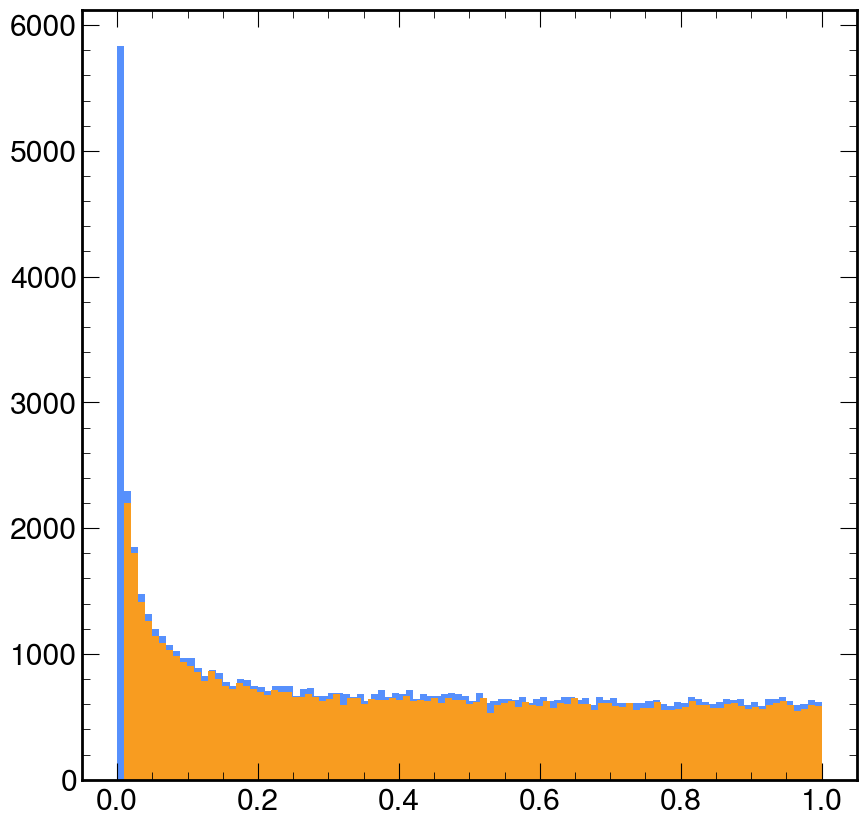

In [54]:
m = ak.flatten(events[aggMask_list[4]]['Y_Vtx_Prob'], axis=1)
plt.hist(m, bins=100)
m = ak.flatten(events[aggMask_list[5]]['Y_Vtx_Prob'], axis=1)
plt.hist(m, bins=100)

In [ ]:
variables = 

variables_str = ', '.join(variables)
variables_str


In [43]:
for field in events.fields:
    print(field)

Event
Run
LumiBlock
Mu_TriggerPath
Z_soft1
Z_soft2
Z_Vtx_Mass
Z_mass
Z_pt1
Z_pt2
Z_eta1
Z_eta2
Z_lowPt
Z_highPt
Y_Vtx_Mass
Y_mass
Y_pt1
Y_pt2
Y_eta1
Y_eta2
Y_mvaIsoWP90_1
Y_mvaIsoWP90_2
Z_Vtx_Prob
Y_Vtx_Prob
FourL_mass
FourL_Vtx_Prob
Y_lowPt
Y_highPt


In [18]:
m = ak.flatten(events[aggMask_list[8]]['Y_mass'], axis=1)

(array([160., 169., 189., 166., 189., 178., 180., 208., 207., 207.]),
 array([8.00371933, 8.20323658, 8.40275383, 8.60227108, 8.80178833,
        9.00130558, 9.20082283, 9.40034008, 9.59985733, 9.79937458,
        9.99889183]),
 <BarContainer object of 10 artists>)

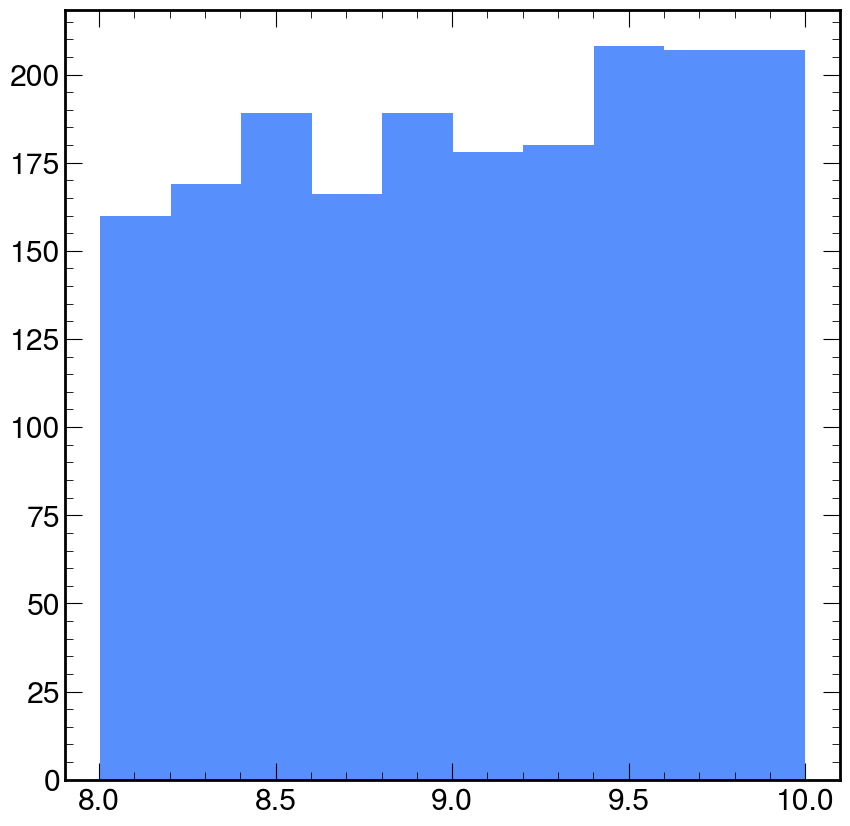

In [19]:
plt.hist(m)

In [10]:
cut_FourLmass_candi = (branches['FourL_mass'] > 112) & (branches['FourL_mass'] < 162)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 112, 162
plt.hist(ak.flatten(branches.FourL_mass), bins=nbins, label="FourL_mass", alpha=0.5, range=(xlow, xhigh))
mean = np.mean(ak.flatten(branches.FourL_mass))
std = np.std(ak.flatten(branches.FourL_mass))
plt.text(0.75, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.75, 0.85, f"Events: {len(ak.flatten(branches.FourL_mass))}", transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('FourL inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/FourL_mass.png")

branches = branches[cut_FourLmass_candi]

print_summary(branches, "FourL mass")

NameError: name 'branches' is not defined

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(ak.flatten(branches.Y_eta1), ak.flatten(branches.Y_pt1), '.', label='Ele1')
plt.legend()
plt.xlabel('Ele eta')
plt.ylabel('Ele pT')
plt.tight_layout()

plt.figure(figsize=(6, 6))
plt.plot(ak.flatten(branches.Y_eta2), ak.flatten(branches.Y_pt2), '.', label='Ele2')
plt.legend()
plt.xlabel('Ele eta')
plt.ylabel('Ele pT')
plt.tight_layout()

## Plotting cut steps

In [ ]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 2.8, 12

plt.hist(before_ID_cuts_Y, bins=nbins, label="Acceptance cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(before_trig_cut_Y, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Dielectron inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Y_mass_dist_for {eleID_cut_type} cuts.png")



In [ ]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 70, 110

plt.hist(before_mass_cuts_Z, bins=nbins, label="Acceptance cuts", alpha=0.5, range=(xlow, xhigh))
# plt.hist(before_ID_cuts_Z, bins=nbins, label="Mass cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(before_trig_cut_Z, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Dimuon inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Z_mass_dist_for {eleID_cut_type} cuts.png")

In [ ]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 40, 5, 45

plt.hist(Hpt_before_mass_cuts_Y, bins=nbins, label="Acceptance cut", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Hpt_before_ID_cuts_Y, bins=nbins, label="Mass", alpha=0.5, range=(xlow, xhigh))
plt.hist(Hpt_before_trig_cut_Y, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('High pT electron (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Y_highPt_dist_for {eleID_cut_type} cuts.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 5, 20

plt.hist(Lpt_before_mass_cuts_Y, bins=nbins, label="Acceptance cut", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Lpt_before_ID_cuts_Y, bins=nbins, label="Mass", alpha=0.5, range=(xlow, xhigh))
plt.hist(Lpt_before_trig_cut_Y, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Low pT electron (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Y_lowPt_dist_for {eleID_cut_type} cuts.png")

In [ ]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 20, 150

plt.hist(Hpt_before_mass_cuts_Z, bins=nbins, label="Acceptance cuts", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Hpt_before_ID_cuts_Z, bins=nbins, label="Mass cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(Hpt_before_trig_cut_Z, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('High pT Muon (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Z_highPt_dist_for {eleID_cut_type} cuts.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 0, 100

plt.hist(Lpt_before_mass_cuts_Z, bins=nbins, label="Acceptance cuts", alpha=0.5, range=(xlow, xhigh))
# plt.hist(Lpt_before_ID_cuts_Z, bins=nbins, label="Mass cut", alpha=0.5, range=(xlow, xhigh))
plt.hist(Lpt_before_trig_cut_Z, bins=nbins, label=f"WP90 {eleID_cut_type}", alpha=0.5, range=(xlow, xhigh))
plt.xlabel('Low pT Muon (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/Z_lowPt_dist_for {eleID_cut_type} cuts.png")

In [ ]:
# highestPt_muon = ak.argmax(branches.Z_highPt, axis=1, keepdims=True, mask_identity=True)

# cut_ZtrackIso_candi = (branches['Z_trackIso1'][highestPt_muon] < 0.35) & (branches['Z_trackIso2'][highestPt_muon] < 0.35)
# cut_ZtrackIso_event = ak.any(cut_ZtrackIso_candi, axis=1)

# plt.hist(ak.flatten(branches.Z_trackIso1[highestPt_muon]), bins=100, range=(0, 2), label="Z_trackIso1", alpha=0.5)
# plt.hist(ak.flatten(branches.Z_trackIso2[highestPt_muon]), bins=100, range=(0, 2), label="Z_trackIso2", alpha=0.5)
# plt.axvline(x=0.35, color='r')
# plt.xlabel('Z_trackIso')
# # plt.xlim([0,1])
# plt.legend()

# branches = branches[cut_ZtrackIso_candi][cut_ZtrackIso_event]

# print_summary(branches, "ZTrackIso")

## Fitting

In [ ]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 2.8, 12
plt.hist(ak.flatten(branches.Y_mass), bins=nbins, label="Y_mass", alpha=0.5, range=(xlow, xhigh))

# show mean and std on plot
mean = np.mean(ak.flatten(branches.Y_mass))
std = np.std(ak.flatten(branches.Y_mass))
plt.text(0.8, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.8, 0.85, f"Events: {len(ak.flatten(branches.Y_mass))}", transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Dielectron inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/fit_histogram_Y_{eleID_cut_type}.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 70, 110
plt.hist(ak.flatten(branches.Z_mass), bins=nbins, label="Z_mass", alpha=0.5, range=(xlow, xhigh))

# show mean and std on plot
mean = np.mean(ak.flatten(branches.Z_mass))
std = np.std(ak.flatten(branches.Z_mass))
plt.text(0.8, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.8, 0.85, f"Events: {len(ak.flatten(branches.Z_mass))}", transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Dimuon inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/fit_histogram_Z_{eleID_cut_type}.png")

In [ ]:
Z_candidates = ak.flatten(branches['Z_mass']).to_numpy()
Z_mass = ROOT.RooRealVar("Z_mass", "Z_mass", 70, 110, "GeV")
data = ROOT.RooDataSet.from_numpy({f"Z_mass": Z_candidates}, [Z_mass])

frame = fit_unbinned_gauss_with_background(data, Z_mass, 20)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs(f"{savepath}/fit_gauss_Z_{eleID_cut_type}.png")

In [ ]:
Y_candidates = ak.flatten(branches['Y_mass']).to_numpy()
Y_mass = ROOT.RooRealVar("Y_mass", "Y_mass", 2.8, 12, "GeV")
data = ROOT.RooDataSet.from_numpy({f"Y_mass": Y_candidates}, [Y_mass])

frame = fit_unbinned_double_gauss(data, Y_mass, 20)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Y Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs(f"{savepath}/fit_dg_Y_{eleID_cut_type}.png")